In [1]:
# check convergence condition - diagonally dominance (Bobot maks: 5%)

# import seluruh libraries yang dibutuhkan
import numpy as np

# INPUT THE MATRIX
a = [[4,1,-2],[-2,-8,5],[1,1,8]]

# Find diagonal coefficients
diag = np.diag(np.abs(a))

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag

# check the condition
if np.all(diag > off_diag):
    print("Matrix is diagonally dominat")
else :
    print("NOT diagonally dominant")



Matrix is diagonally dominat


In [3]:
# Gauss-Seidel iterative method (Bobot maks: 15%)
import numpy as np
# inisialisasi data awal
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

# metode Gauss-Seidel
x_old = np.array([x1,x2,x3])

print("Iteration results : ")
print("k,     x1,     x2,     x3")
for k in range(1,50):
    x1 = (2-1*x2+2*x3)/4
    x2 = (5+2*x1-5*x3)/(-8)
    x3 = (-3-1*x1-1*x2)/8
    x = np.array([x1,x2,x3])
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k,x1,x2,x3))
    if dx < epsilon:
        converged = True
        print("Converged")
        break
    
    x_old = x
    
if not converged:
    print ("Not converge, increase the # of iterations")
    
print("\nSolusi sistem persamaan linear : ")
for i in range(len(x)):
    print(f"x{i+1} = {x[i]:.4f}")
    
#Berdasarkan Materi Pembelajaran Pertemuan 4 Numerical Analysis Universitas Multimedia Nusantara, meskipun sistem persamaan linear tidak diagonally dominant, hal tersebut tetap memungkinkan untuk mendapatkan solusinya berupa Converge



Iteration results : 
k,     x1,     x2,     x3
1, 0.5000, -0.7500, -0.3438
2, 0.5156, -0.9688, -0.3184
3, 0.5830, -0.9697, -0.3267
4, 0.5791, -0.9739, -0.3256
Converged

Solusi sistem persamaan linear : 
x1 = 0.5791
x2 = -0.9739
x3 = -0.3256


In [5]:
# Finding max Eigenvalue and Eigenvector (Bobot maks: 10%)
import numpy as np
# define a normalize function
def normalize(x):
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n

# inisialisasi data awal
x = np.array([1, 1, 1])
a = np.array([[2,1,2],
              [1,3,2],
              [2,4,1]])

for i in range(10):
    x = np.dot(a, x)
    lambda_1, x = normalize(x)

# eigenvalue dan eigenvector
print("The Max Eigen Value : ", lambda_1)
print("The Max Eigen Vector : ", x)


The Max Eigen Value :  6.029110693230817
The Max Eigen Vector :  [0.71918698 0.89768456 1.        ]


In [7]:
# Finding all eigenvalues and eigenvectors using built-in function eig (Bobot maks: 10%)
# import seluruh libraries yang dibutuhkan
import numpy as np
from numpy.linalg import eig

# tampilkan seluruh eigenvalues dan eigenvectors dengan fungsi 'eig'
a = np.array([[2,1,2],
              [1,3,2],
              [2,4,1]])

value, vector = eig(a)

print("Eigenvalue : ", value)
print("Eigenvector : ", vector)
print("\n")

print("Explanation : ")
for i in range(len(value)):
    print("When eigenvalue = ", value[i], ", the eigenvector is ", vector[i])


Eigenvalue :  [ 6.02911192  1.33625596 -1.36536788]
Eigenvector :  [[-0.47185751 -0.88987496 -0.42138925]
 [-0.58896955  0.45081499 -0.29617582]
 [-0.65609859  0.0699171   0.85715284]]


Explanation : 
When eigenvalue =  6.029111920025984 , the eigenvector is  [-0.47185751 -0.88987496 -0.42138925]
When eigenvalue =  1.336255963212593 , the eigenvector is  [-0.58896955  0.45081499 -0.29617582]
When eigenvalue =  -1.3653678832385763 , the eigenvector is  [-0.65609859  0.0699171   0.85715284]


In [9]:
# bangun titik-titik data x dan y (Bobot: 2%)
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 101)
y = 100 - x - x * np.random.random(len(x))

# bangun matrix A dan ubah y menjadi vektor kolom (Bobot: 2%)
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]

# Direct Least Square Regression (Bobot: 5%)
direct = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)
print(direct)

# Pseudo-inverse method (Bobot: 3%)
pinv = np.linalg.pinv(A)
pseudo = pinv.dot(y)
print(pseudo)

# Built-in lstsq dari numpy (Bobot: 3%)
builtIn = np.linalg.lstsq(A, y, rcond=None)[0]
print(builtIn)

[[ -1.58991702]
 [100.03562749]]
[[ -1.58991702]
 [100.03562749]]
[[ -1.58991702]
 [100.03562749]]


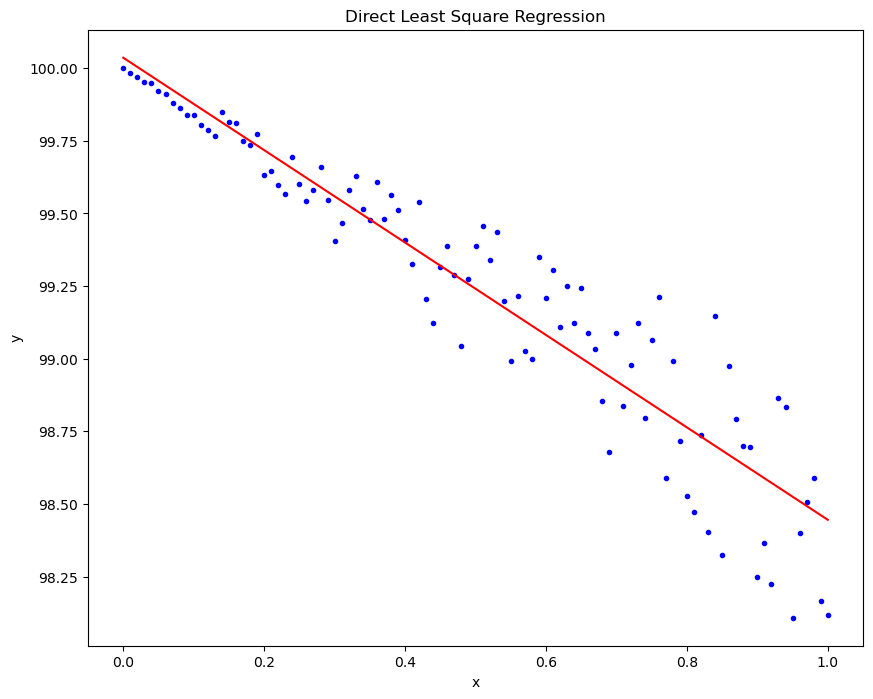

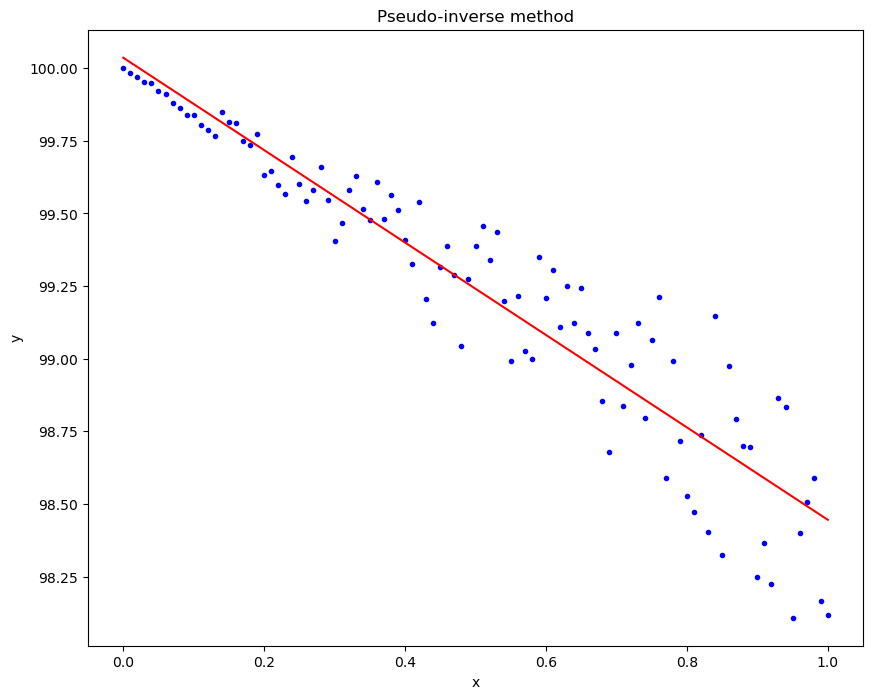

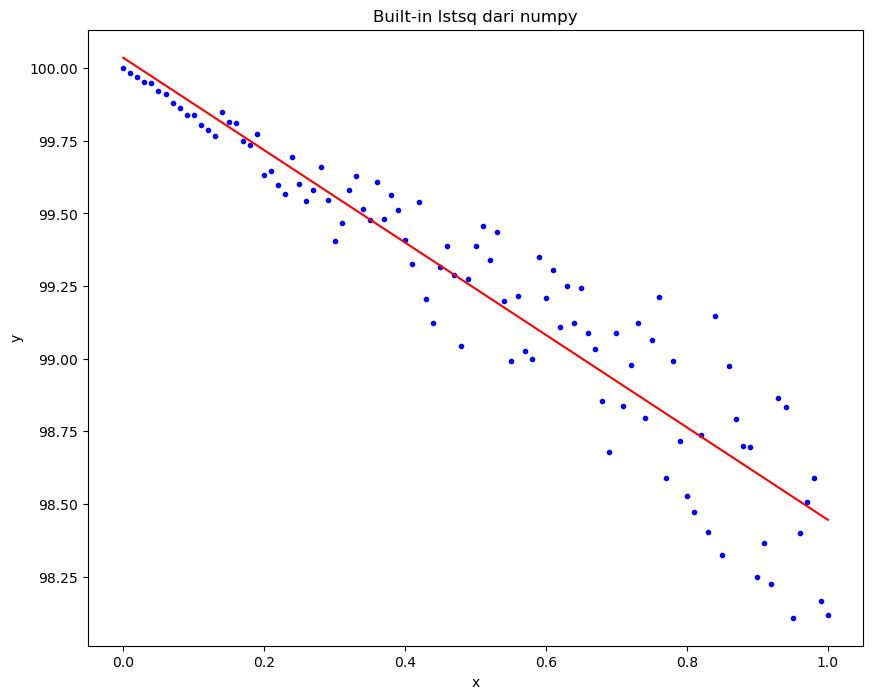

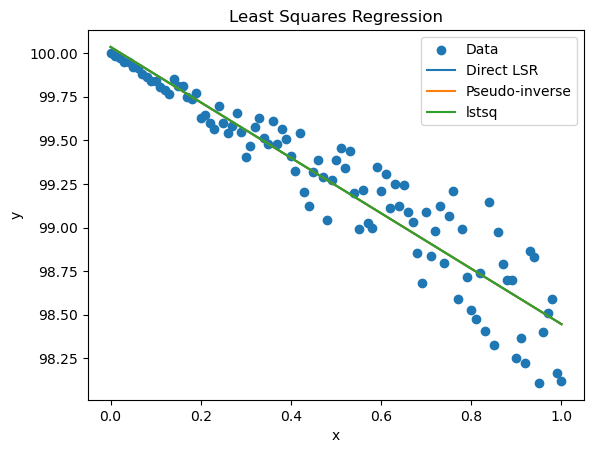

In [11]:
# Plot hasil (Bobot maks: 5%)

# import seluruh libraries yang dibutuhkan
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
#plt.style.use("seaborn-poster")

# sajikan plot hasil
#Plot hasil untuk Direct Least Square Regression
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, direct[0] * x + direct[1], "r")
plt.title('Direct Least Square Regression')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Plot hasil untuk Pseudo-inverse method
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, pseudo[0] * x + pseudo[1], "r")
plt.title('Pseudo-inverse method')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Plot hasil untuk Built-in lstsq dari numpy
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, builtIn[0] * x + builtIn[1], "r")
plt.title('Built-in lstsq dari numpy')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#Plot hasil gabungan antara ketiga metode
#Untuk menjalankan program di bawah ini alangkah baiknya bagian atas melakukan run terlebih dahulu
plt.scatter(x, y, label='Data')

# Plot hasil pendekatan LSR
y_pred_direct = A @ direct
plt.plot(x, y_pred_direct, label='Direct LSR')

y_pred_pseudo = A @ pseudo
plt.plot(x, y_pred_pseudo, label='Pseudo-inverse')

y_pred_lstsq = A @ builtIn
plt.plot(x, y_pred_lstsq, label='lstsq')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Regression')
plt.legend()
plt.show()

#Perbandingan hasilnya dengan metode Direct Least Square Regression, Pseudo-inverse method, dan Built-in lstsq dari numpy mendapatkan hasilnya adalah sama

In [13]:
# my_lagrange function (Bobot maks: 10%)

# definisi fungsi my_lagrange(x,y,X)
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("seaborn-poster")

def my_lagrange(x, y, X):
    Y = np.zeros_like(X)
    n = len(x)

    for i in range(n):
        L = np.ones_like(X)
        for j in range(n):
            if i != j:
                L = L * (X - x[j]) / (x[i] - x[j])
        Y = Y + y[i] * L

    return Y



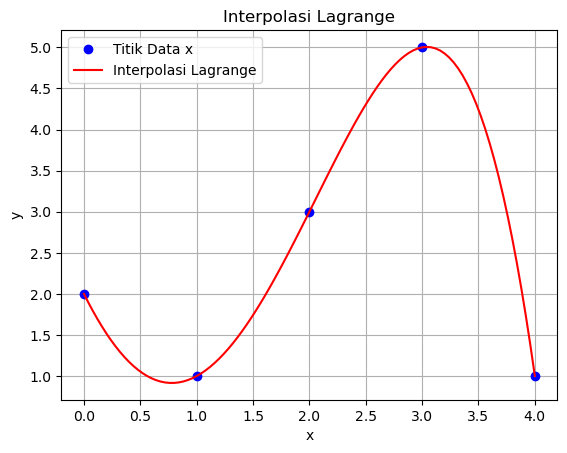

In [15]:
# bangun titik-titik data x, y, dan X (Bobot: 5%)
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

X = np.linspace(0, 4, 101)

#Untuk menjalankan program di bawah ini alangkah baiknya bagian atas melakukan run terlebih dahulu
Y = my_lagrange(x, y, X)

# Plot hasil (Bobot maks: 5%)
plt.plot(x, y, 'bo', label='Titik Data x')
plt.plot(X, Y, 'r-', label='Interpolasi Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Lagrange')
plt.legend()
plt.grid(True)
plt.show()
